# Stock Analysis Capstone Project  

-----

**Complete the tasks in bold below**

**TASK: Run the cells below to import the relevant libraries and load the related .csv files.**

** Download from yahoo finance website your own stocks and build your portfolio up.** 

** By doing this, work with the stocks that you are going to get them from yahoo finance.**


In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates

**Portfolio of Bank Stocks**

In [213]:
#YOU MUST CHANGE THE STOCKS BELOW AND BUID UP YOUR OWN PORTFOLIO

# AAPL: Apple Inc
# JNJ: Johnson & Johnson
# KO: Coca-Cola
# TSLA: Tesla
# XOM: Exxon Mobil

AAPL = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
JNJ = yf.download('JNJ', start='2018-01-01', end='2023-12-31')
KO = yf.download('KO', start='2018-01-01', end='2023-12-31')
TSLA = yf.download('TSLA', start='2018-01-01', end='2023-12-31')
XOM = yf.download('XOM', start='2018-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### List and Dictionary for Convenience

In [214]:
portfolio_list = [AAPL, JNJ, KO, TSLA, XOM]

In [215]:
portfolio_dict = {'AAPL': AAPL, 'JNJ': JNJ, 'KO': KO, 'TSLA': TSLA, 'XOM': XOM}

-----------------------

### Part One: Returns Analysis
-----------

**TASK: What is the start date and what is the end date for the price history of these stocks? (Note: They all share the same timespan, you just need to figure it out for one stock holding.)**

In [216]:
#CODE HERE
start_date = AAPL.index.min()
end_date = AAPL.index.max()

print("Start date:", start_date)
print("End date:", end_date)

Start date: 2018-01-02 00:00:00
End date: 2023-12-29 00:00:00


**TASK: Create a line plot showing the Adj. Close prices over the last 5 years for all the stocks in the portfolio (together on the same plot). Make sure the plot has a legend. [Hint to get them all on the same figure (but there are many ways to do this)](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)**

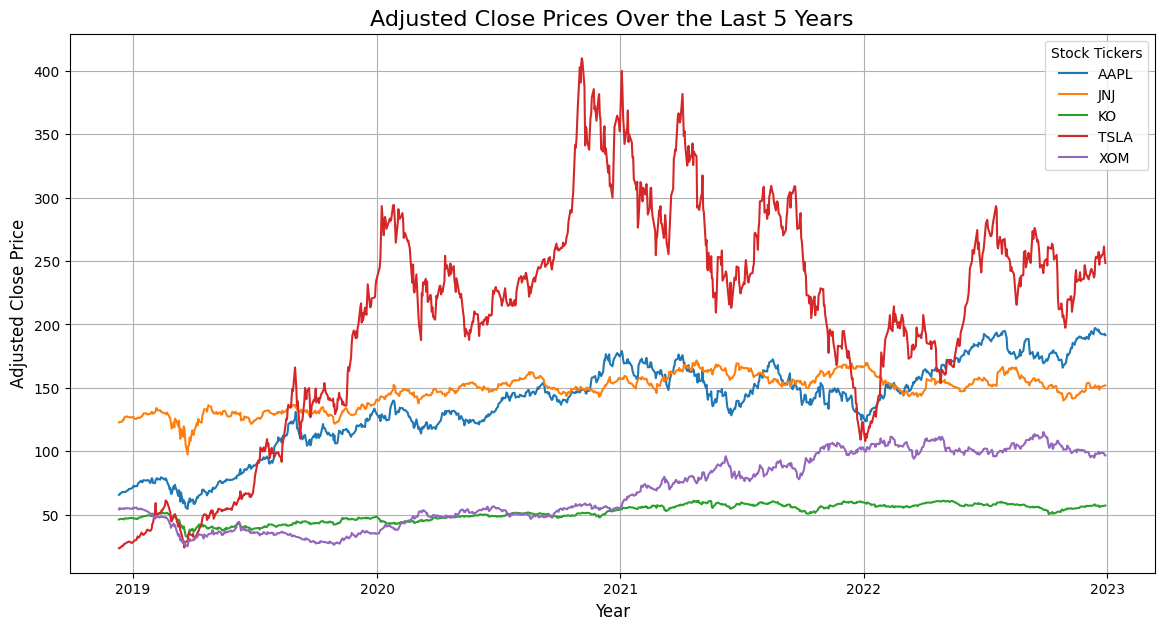

In [217]:
#CODE HERE
end_date = pd.to_datetime("today")
start_date = end_date - pd.DateOffset(years=5)

plt.figure(figsize=(14, 7))

for ticker, stock in portfolio_dict.items():
    filtered_stock = stock[(stock.index >= start_date) & (stock.index <= end_date)]
    plt.plot(filtered_stock.index, filtered_stock['Adj Close'], label = ticker)

plt.title("Adjusted Close Prices Over the Last 5 Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Adjusted Close Price", fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(pd.date_range(start=start_date, end=end_date, freq='YE'))
plt.legend(title="Stock Tickers")
plt.grid(True)
plt.show()

**TASK: Create a function that takes in the Adj. Close price series, and then can calculate the stocks percent rise or decline from any set of given dates. For example, you should be able to pass in perc_calc(BAC,'2016-09-06','2021-09-03') and get back "Percent Change: 187.7%".**

You can actually do this in one line, but don't feel like you *have* to. You should also note, that you don't need to worry about checking someone's date, you can assume the dates provided are in the dataset (e.g. user won't pass in 2020-12-25). Feel free to add in a datetime check if you want.

In [218]:
def perc_calc(ticker, start_date, end_date):
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    if start_date not in ticker.index or end_date not in ticker.index:
        return f"Error: One or both dates are not in the dataset!"
    
    start_price = ticker.loc[start_date, 'Adj Close']
    end_price = ticker.loc[end_date, 'Adj Close']
    
    if isinstance(start_price, pd.Series):
        start_price = start_price.values[0]
    if isinstance(end_price, pd.Series):
        end_price = end_price.values[0]
    
    percent_change = ((end_price - start_price) / start_price) * 100
    
    return f"Percent Change: {percent_change:.1f}%"

In [219]:
perc_calc(AAPL,'2018-02-01','2021-09-03')

'Percent Change: 284.1%'

**TASK: Create a histogram of the daily returns for each stock in the portfolio:**

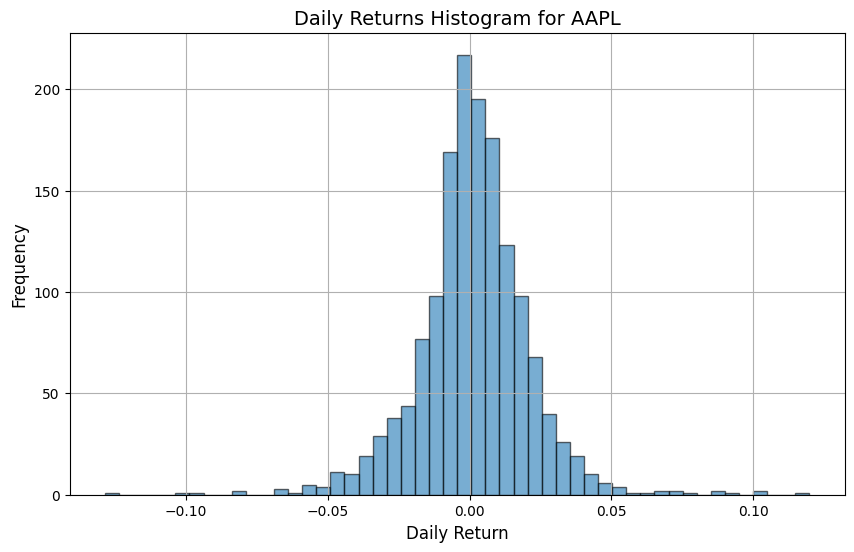

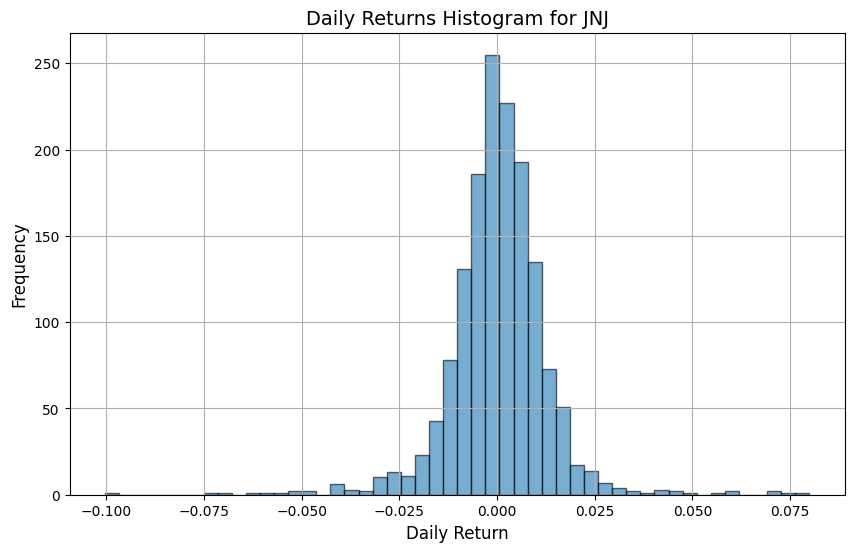

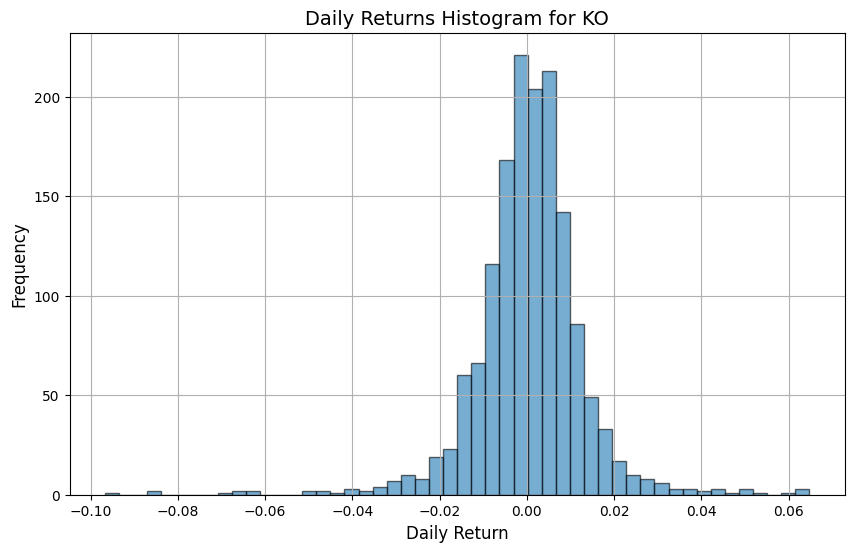

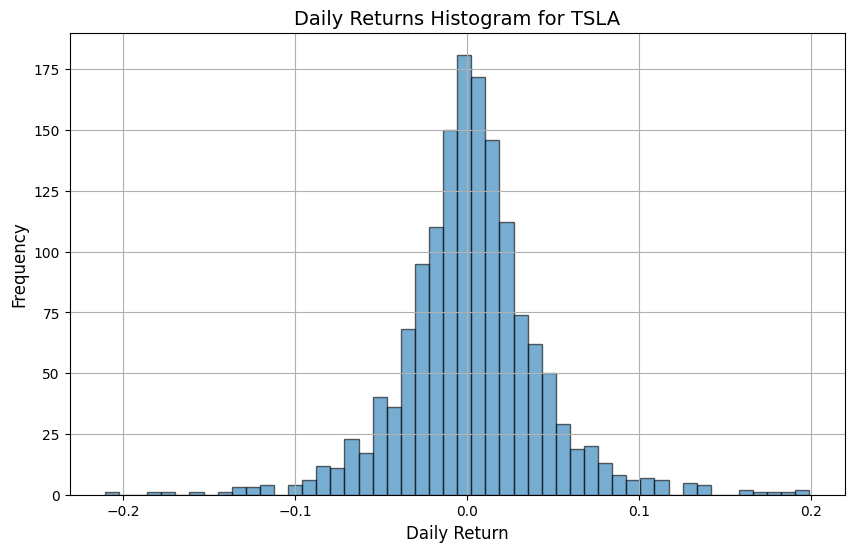

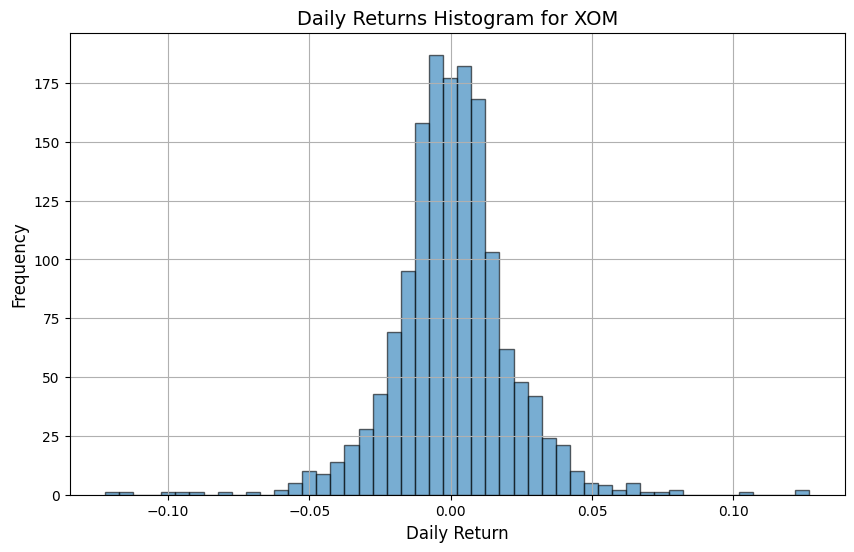

In [220]:
#CODE HERE
for ticker, stock in portfolio_dict.items():
    daily_returns = stock['Adj Close'].pct_change().dropna()
    plt.figure(figsize=(10, 6))
    plt.hist(daily_returns, bins=50, alpha=0.6, edgecolor='black')
    plt.title(f"Daily Returns Histogram for {ticker}", fontsize=14)
    plt.xlabel("Daily Return", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()

**TASK: If you had invested \\$10,000 in BAC (approximately 701 shares) at the start of the time series, you would have about \\$28773 at the end of the time period. Create a plot that shows the value of \\$10,000 BAC at the start of the time series and what value it would have in dollars throughout the rest of the time period.**

*Note: There are many ways to calculate this!*

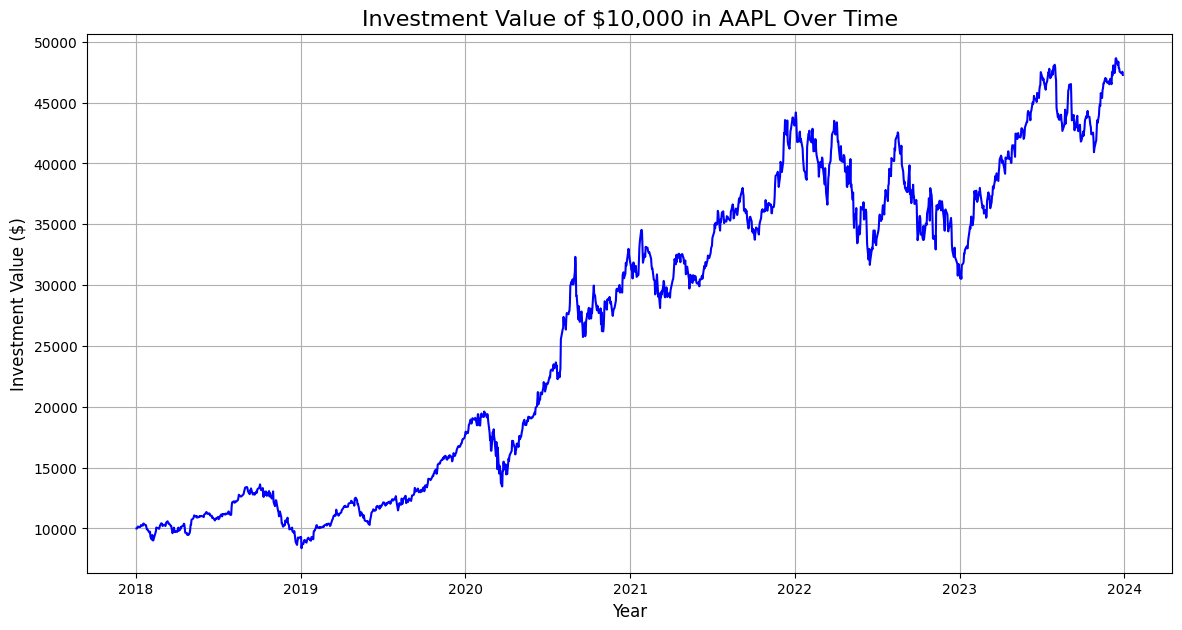

In [221]:
#CODE HERE
initial_price = AAPL['Adj Close'].iloc[0]
initial_investment = 10000
shares_bought = initial_investment / initial_price

investment_value = shares_bought * AAPL['Adj Close']

plt.figure(figsize=(14, 7))
plt.plot(AAPL.index, investment_value, label="AAPL Investment Value", color='blue')

plt.title("Investment Value of $10,000 in AAPL Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Investment Value ($)", fontsize=12)
plt.grid(True)
plt.show()

**TASK: Find the Annualized Sharpe Ratios for each stock in the portfolio.**

In [222]:
#CODE HERE
def annualized_sharpe_ratio(stock, risk_free_rate=0):
    daily_returns = stock['Adj Close'].pct_change().dropna()
    mean_daily_return = daily_returns.mean()
    daily_volatility = daily_returns.std()
    annualized_return = mean_daily_return * 252 # working days
    annualized_volatility = daily_volatility * np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    return sharpe_ratio

for ticker, stock in portfolio_dict.items():
    print(annualized_sharpe_ratio(stock))

Ticker
AAPL    0.978331
dtype: float64
Ticker
JNJ    0.333255
dtype: float64
Ticker
KO    0.468725
dtype: float64
Ticker
TSLA    0.961379
dtype: float64
Ticker
XOM    0.398046
dtype: float64


------------------
### Part Two:  Volume Analysis 
-------------

**TASK: Create a plot showing the daily volume of stock traded over the time period of 5 years.**

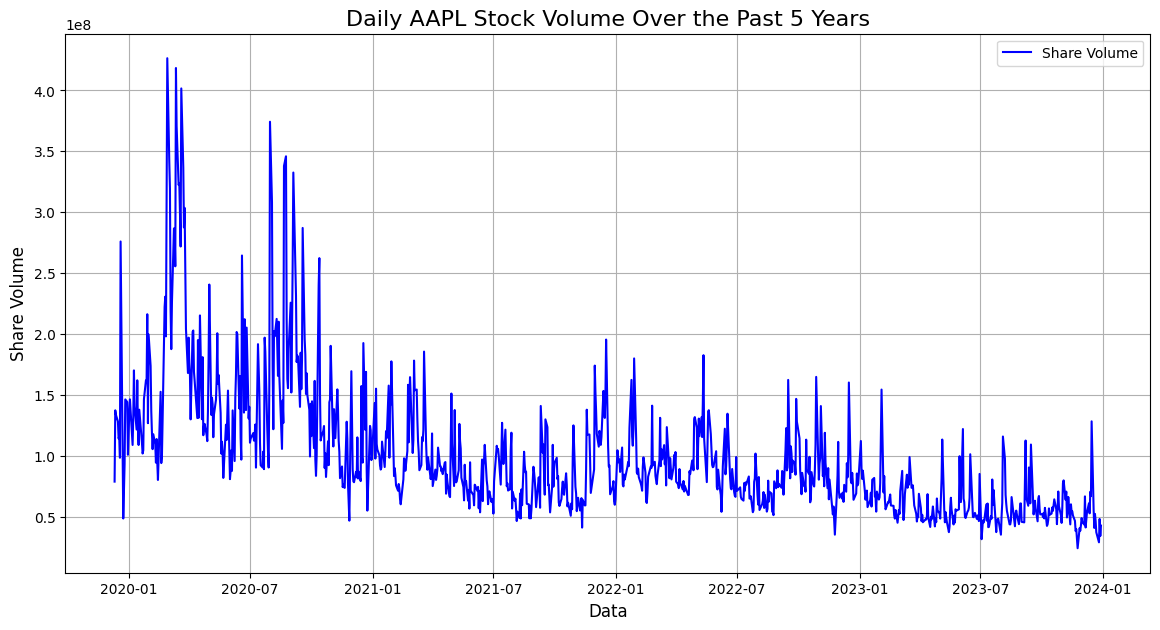

In [223]:
#CODE HERE
end_date = pd.to_datetime("today")
start_date = end_date - pd.DateOffset(years=5)

filtered_stock = AAPL[(AAPL.index >= start_date) & (AAPL.index <= end_date)]

plt.figure(figsize=(14, 7))
plt.plot(filtered_stock.index, filtered_stock['Volume'], label='Share Volume', color='blue')

plt.title("Daily AAPL Stock Volume Over the Past 5 Years", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Share Volume", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**TASK: Now create a similar plot as the previous one, but it should reflect the total dollar amount, meaning you will need to take into account the price on each day the volume was traded. Feel free to use Adj Close price as the consensus price for a given day.**

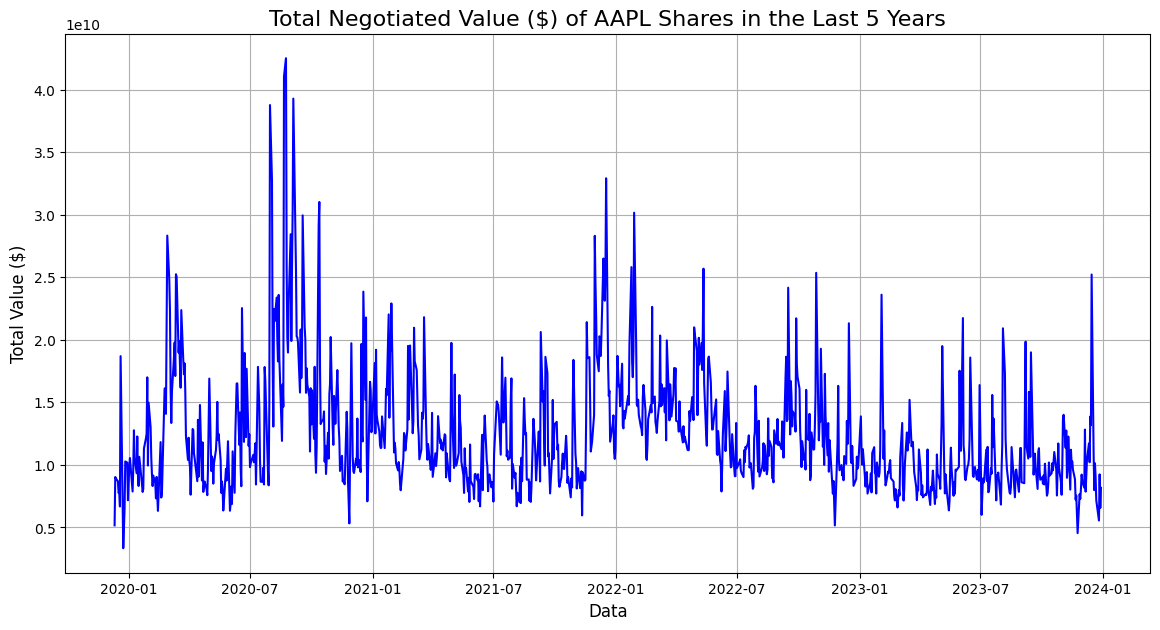

In [224]:
# CODE HERE
end_date = pd.to_datetime("today")
start_date = end_date - pd.DateOffset(years=5)

filtered_stock = AAPL[(AAPL.index >= start_date) & (AAPL.index <= end_date)].copy()

filtered_stock['Total_Value'] = filtered_stock['Volume'] * filtered_stock['Adj Close']

plt.figure(figsize=(14, 7))
plt.plot(filtered_stock.index, filtered_stock['Total_Value'], label='Total Negotiated Value ($)', color='blue')

plt.title("Total Negotiated Value ($) of AAPL Shares in the Last 5 Years", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Total Value ($)", fontsize=12)
plt.grid(True)
plt.show()

**TASK: Based on your plot above, which stock had the highest dollar value amount traded of their stock on a single day and what date was this? Did anything significant happen aroudn this time period for that company?**

In [225]:
# CODE HERE
max_value_row = filtered_stock.loc[filtered_stock['Total_Value'].idxmax()]

max_value_date = max_value_row.name
max_value = float(max_value_row.iloc[0])

if isinstance(max_value_date, pd.Timestamp):
    max_value_date = max_value_date.strftime('%Y-%m-%d') 
else:
    max_value_date = str(max_value_date)  

print(f"O maior valor de negociação em um único dia foi {max_value:.2f} USD em {max_value_date}.")


O maior valor de negociação em um único dia foi 122.86 USD em 2020-08-24.


--------
### Part Three: Technical Analysis
----

**TASK: Using only BAC stock, create a plot showing the Adj. Close Price along with the 60 day moving average of the price on the same plot.**

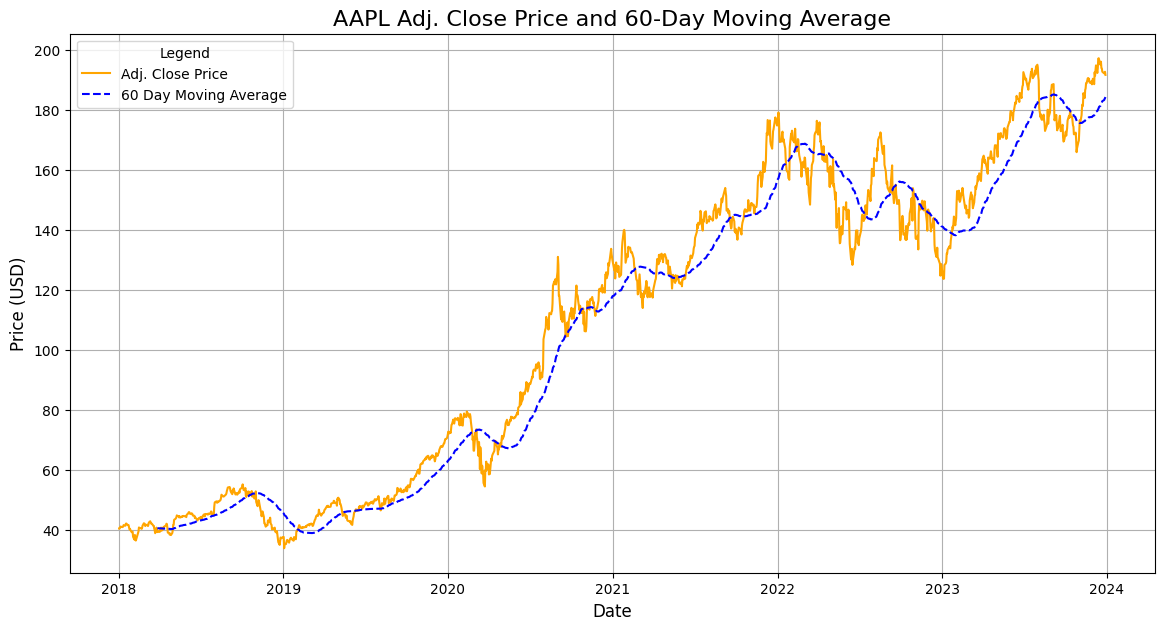

In [226]:
# CODE HERE
AAPL['60_day_MA'] = AAPL['Adj Close'].rolling(window=60).mean()

plt.figure(figsize=(14, 7))
plt.plot(AAPL.index, AAPL['Adj Close'], label='Adj. Close Price', color='orange')
plt.plot(AAPL.index, AAPL['60_day_MA'], label='60 Day Moving Average', color='blue', linestyle='--')
plt.title("AAPL Adj. Close Price and 60-Day Moving Average", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(title="Legend", fontsize=10)
plt.grid(True)
plt.show()

**BONUS TASK : Creating Bollinger Bands.**

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity, using a formulaic method propounded by John Bollinger in the 1980s.

 Bollinger Bands consist of an N-period moving average (MA), an upper band at K times an N-period standard deviation above the moving average (MA + Kσ), and a lower band at K times an N-period standard deviation below the moving average (MA − Kσ). The chart thus expresses arbitrary choices or assumptions of the user, and is not strictly about the price data alone.

Typical values for N and K are 20 days and 2, respectively.

Source: [https://en.wikipedia.org/wiki/Bollinger_Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)

**TASK: Create a plot which has the Adj. Close price and the upper and lower bollinger bands. Use the formula above, with N=20 days for the rolling rate of the moving average and K=2 for the multiplication of the standard deviation.**

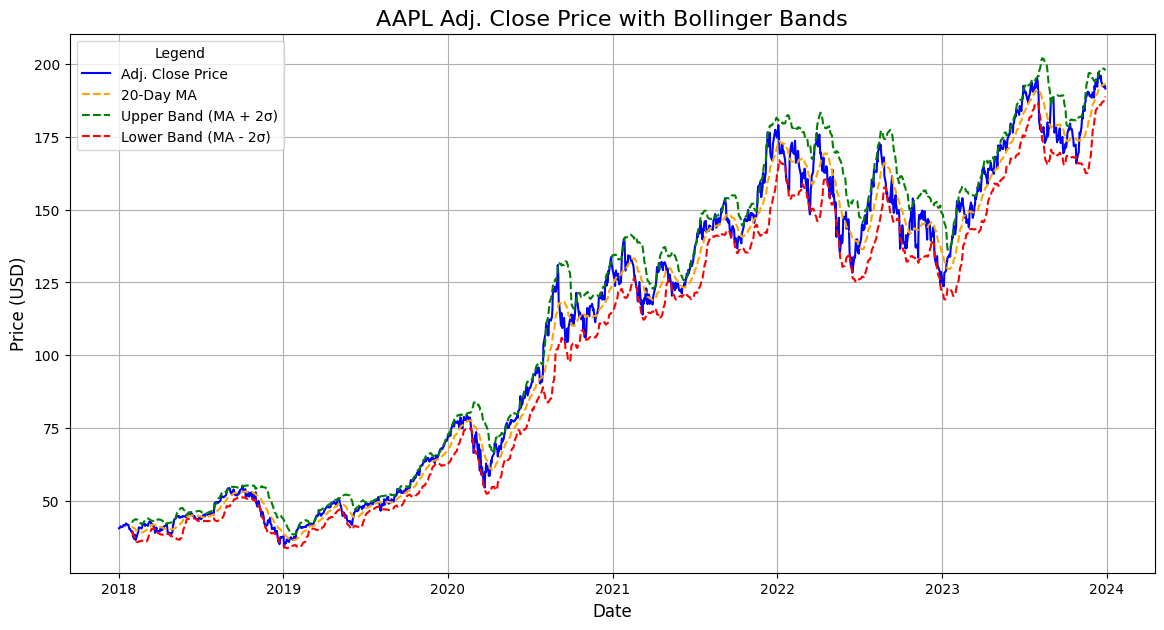

In [227]:
N = 20
K = 2

AAPL['MA20'] = AAPL['Adj Close'].rolling(window=N).mean()
AAPL['STD20'] = AAPL['Adj Close'].rolling(window=N).std()

AAPL['Upper Band'] = AAPL['MA20'] + (K * AAPL['STD20'])
AAPL['Lower Band'] = AAPL['MA20'] - (K * AAPL['STD20'])

plt.figure(figsize=(14, 7))
plt.plot(AAPL.index, AAPL['Adj Close'], label='Adj. Close Price', color='blue')
plt.plot(AAPL.index, AAPL['MA20'], label=f'{N}-Day MA', color='orange', linestyle='--')
plt.plot(AAPL.index, AAPL['Upper Band'], label='Upper Band (MA + 2σ)', color='green', linestyle='--')
plt.plot(AAPL.index, AAPL['Lower Band'], label='Lower Band (MA - 2σ)', color='red', linestyle='--')
plt.title("AAPL Adj. Close Price with Bollinger Bands", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.legend(title="Legend", fontsize=10)
plt.grid(True)
plt.show()

PART II


---

### **1. Weighted and Cumulative Returns**  
**Scenario**: You are analyzing the portfolio performance of YOURS stocks: You have daily return data for each stock and their respective weights in the portfolio:  
(Example: \(AAPL\): 40%, \(GOOGL\): 35%, \(AMZN\): 25%).  

**Task**: Write a Python function that:  
1. Calculates the **weighted daily returns** of the portfolio.  
2. Computes the **cumulative returns** over time.  
3. Visualizes both the daily and cumulative returns on a single graph.  

---

### **2. Sortino Ratio for Performance Measurement**  
**Scenario**: Your portfolio manager asks for an evaluation of the portfolio's risk-adjusted performance using the Sortino ratio. The portfolio consists of daily returns for a year, and the minimum acceptable return (MAR) is \(0.02\).  

**Task**:  
1. Write a Python script that calculates the **Sortino ratio** for the portfolio.  
   - Use the formula:  
     \[
     \text{Sortino Ratio} = \frac{\text{Average Portfolio Return} - \text{MAR}}{\text{Downside Deviation}}
     \]
2. Identify and display days with negative returns contributing to the downside deviation.

---

### **3. Optimal Weighting Through Minimization Search: Efficient Frontier**  
**Scenario**: You have historical data for 5 stocks and want to construct an optimal portfolio along the efficient frontier.  

**Task**: Write a Python script to:  
1. Calculate the expected returns and covariance matrix of the stocks.  
2. Use **minimization** techniques (e.g., `scipy.optimize`) to find the **optimal weights** that minimize portfolio volatility for a given target return.  
3. Plot the efficient frontier, showing risk (volatility) vs. return.  

---

### **4. Volatility Analysis: Daily Return Performance Comparison**  
**Scenario**: You are tasked with comparing the daily return performance and volatility of your portfolio against the S&P 500 index.  

**Task**:  
1. Calculate the **daily returns** for both the portfolio and S&P 500.  
2. Compute and compare their respective **volatilities** (standard deviation of daily returns).  
3. Visualize the daily returns of the portfolio and S&P 500 on a single plot, highlighting volatility differences.  

---

### **5. Capital Asset Pricing Model (CAPM)**  
**Scenario**: You are tasked with analyzing an investment using the Capital Asset Pricing Model (CAPM). The following inputs are provided:  
- Risk-free rate (\(R_f\)) = 1.5%  
- Beta of the investment (\(\beta\)) = 1.2  
- Expected return of the market (\(E[R_m]\)) = 10%  

**Task**:  
1. Write a Python function to calculate the expected return of the investment (\(E[R_i]\)) using CAPM:  
   \[
   E[R_i] = R_f + \beta \cdot (E[R_m] - R_f)
   \]
2. Generate a visualization showing the CAPM line (Security Market Line, SML) with the investment plotted relative to the market and other hypothetical assets.  

---


# Efficient Frontier
target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 50)
efficient_portfolios = []

for target in target_returns:
    result = minimize(minimize_volatility, 
                      num_assets * [1. / num_assets], 
                      args=(mean_returns, cov_matrix, target),
                      method='SLSQP', 
                      bounds=bounds, 
                      constraints=constraints)
    efficient_portfolios.append(result.fun)

# Plot Efficient Frontier
plt.figure(figsize=(10, 7))
plt.scatter([portfolio_performance(minimize_volatility(weights, mean_returns, cov_matrix, r).x, mean_returns, cov_matrix)[1] for r in target_returns],
            target_returns, 
            c='blue', label='Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid()
plt.show()


[*********************100%***********************]  5 of 5 completed


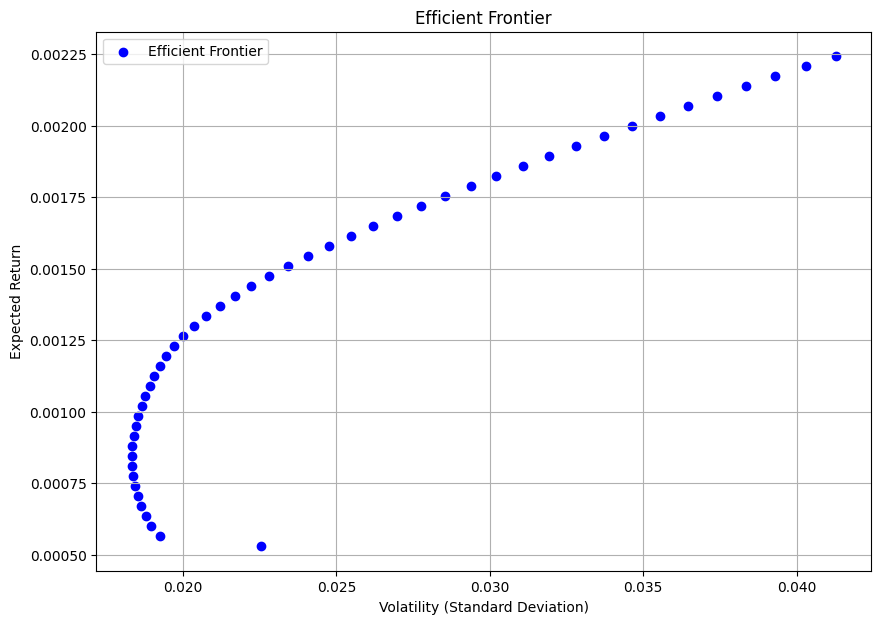

In [228]:
# Define the stock tickers (example: 5 NASDAQ stocks)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch historical data (5 years of daily data)
data = yf.download(tickers, start='2018-01-01', end='2023-01-01')

# Calculate daily returns
daily_returns = data['Adj Close'].pct_change().dropna()

# Calculate mean returns and covariance matrix
mean_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# Risk-free rate (example: 2%)
risk_free_rate = 0.02

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.dot(weights, mean_returns)  # Portfolio return
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio volatility
    return returns, volatility

# Function to minimize volatility for a given return
def minimize_volatility(weights, mean_returns, cov_matrix, target_return):
    p_return, p_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return abs(p_return - target_return)

# Constraints and bounds
num_assets = len(tickers)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets))  # Weights between 0 and 1

# Efficient Frontier
target_returns = np.linspace(mean_returns.min(), mean_returns.max(), 50)
efficient_portfolios = []

for target in target_returns:
    # Combine constraints into a single list
    all_constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # Weights sum to 1
        {'type': 'eq', 'fun': lambda x: portfolio_performance(x, mean_returns, cov_matrix)[0] - target}  # Target return
    ]
    
    result = minimize(
        lambda weights: portfolio_performance(weights, mean_returns, cov_matrix)[1],  # Minimize volatility
        num_assets * [1. / num_assets],  # Initial guess
        method='SLSQP',
        bounds=bounds,
        constraints=all_constraints
    )
    efficient_portfolios.append(result.x)

# Plot Efficient Frontier
volatilities = [portfolio_performance(weights, mean_returns, cov_matrix)[1] for weights in efficient_portfolios]

plt.figure(figsize=(10, 7))
plt.scatter(volatilities, target_returns, c='blue', label='Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.legend()
plt.grid()
plt.show()

Customization:

    Replace tickers with your preferred NASDAQ stocks.
    Adjust the start and end dates as needed.
    Modify risk_free_rate to reflect current rates.

EXPLAIN THE RESULTS PROVIDED FROM EFFICIENT FRONTIER PLOT 

The Efficient Frontier plot shows the relationship between risk and return for different portfolios. It is represented by a curve that indicates the best possible portfolios for specific risk or return levels. Portfolios on the curve are considered optimal, achieving the maximum return for a given risk or the minimum risk for a given return.

Portfolios below the curve are less efficient because they either take on more risk without increasing returns or offer lower returns for the same risk. The point on the far left of the curve shows the portfolio with the lowest possible risk, while moving upward along the curve shows portfolios with higher returns and higher risks.

This visualization helps to identify how to balance risk and return when choosing investment strategies.